In the , you will **train various CNN networks on the CIFAR-10 data set**. It has **10 classes** of 60,000 RGB images in **sizes (32, 32, 3)**. The 10 classes are aeroplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck. A similar data set is the CIFAR-100 data set, which has 100 classes. You don’t need to download the data set separately. It can be downloaded directly through the Keras API.

Dataset 
[https://www.cs.toronto.edu/~kriz/cifar.html](http://)

# CIFAR-10 Experiments
In this and the upcoming segments, you will experiment with a few `hyperparameters and architectures and draw insights from the results`. Some hyperparameters you will play with are listed below:

- Adding and removing dropouts in convolutional layers
- Batch normalisation
- L2 regularisation
- Increasing the number of convolution layers
- Increasing the number of filters in certain layers


# 1. Using Dropouts after the convolution and FC layers

In the first experiment, you will use ‘dropouts’ both after the convolutional and FC layers.



In [1]:
# import libraries
import warnings 
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# batch, classes, epochs
batch_size = 32
num_classes = 10
epochs = 50

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
print('x_train_shape:',x_train.shape)
print('y_train_shape:',y_train.shape)

x_train_shape: (50000, 32, 32, 3)
y_train_shape: (50000, 1)


In [5]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [6]:
# you can saw the all classe is convert in intiger form 
# Totle 10 claase and numbering(0-9)
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

You can see easily the totle 50000 data and image size is (32,32,3) and channles is 3 'RGB'

just like this billow

In [7]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

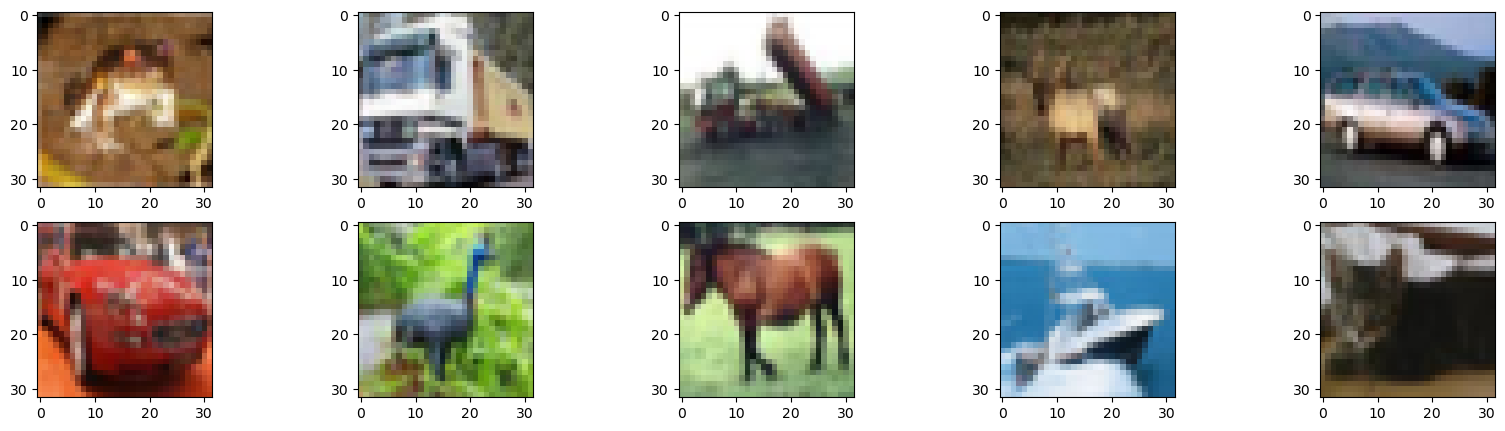

In [9]:
# visualization classes

plt.figure(figsize=(20,5))
for i,x in enumerate(range(10)):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[x])
plt.show()

# you can saw the imgae this is not clear 

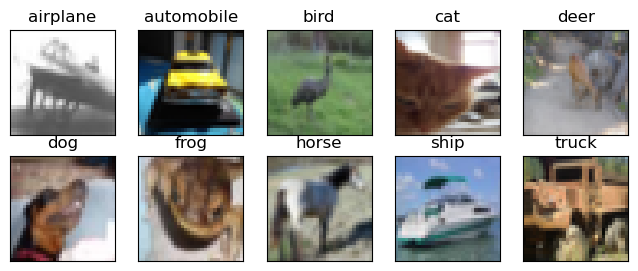

In [10]:
# plotting some random 10 images
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [11]:
print('y_train_shape before converting the binaary class metrics',y_train.shape)
y_train

y_train_shape before converting the binaary class metrics (50000, 1)


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
print('y_test_shape before converting the binaary class metrics',y_test.shape)
y_test

y_test_shape before converting the binaary class metrics (10000, 1)


array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [13]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [14]:
print('y_train_shape after converting the binaary class metrics',y_train.shape)
y_train

y_train_shape after converting the binaary class metrics (50000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
print('y_test_shape after converting the binaary class metrics',y_test.shape)
y_test

y_test_shape after converting the binaary class metrics (10000, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [16]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

The Output is change in matrix form 

In [17]:
# the input shape is (32,32,3)
x_train.shape[1:]

(32, 32, 3)

**Dropout layer**
dropout refers to the practice of disregarding/shutdown certain nodes in a layer at random during training 

Dropout layers are a `regularization technique` commonly used in deep learning models to `prevent overfitting`. Overfitting occurs when a model learns to perform well on the training data but fails to generalize to unseen data.

read this artical [https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5](http://)

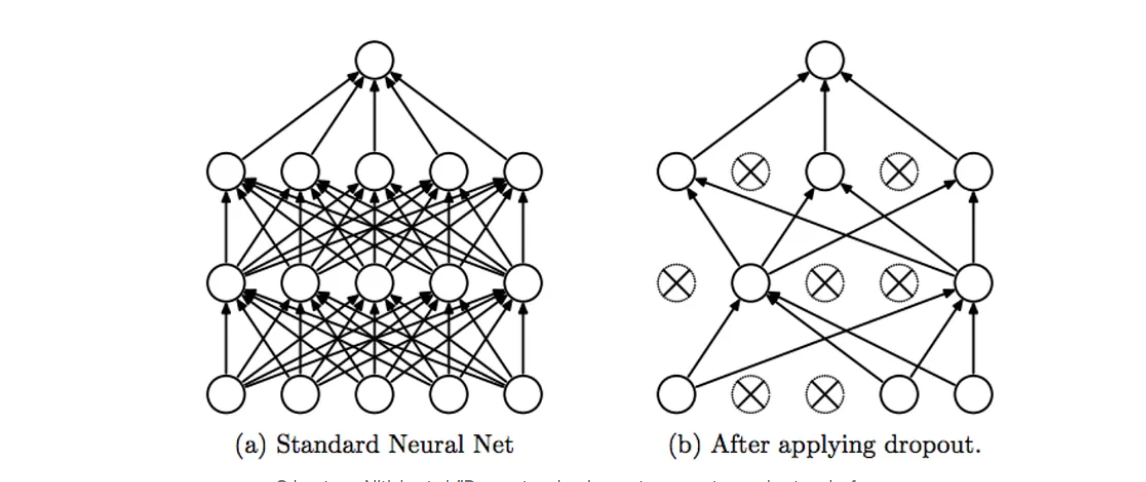



In [18]:
# model architecture
model = Sequential()

# layer 1 :  convolution layer
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

# layer 2 :  convolution layer
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# layer 3 : MaxPooling layer 
model.add(MaxPooling2D(pool_size=(2, 2)))

# layer 4 : Droupout layer and p-value is 0.25
model.add(Dropout(0.25))

# layer 5 :  convolution layer 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

# layer 6 :  convolution layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# layer 7 : MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# layer 8 : DropOut layer and p-value is 0.25
model.add(Dropout(0.25))

# layer 9 : Flatten layer (covert all to 1-D form)
model.add(Flatten())

# layer 10 : FullyConnected Layer 
model.add(Dense(512))
model.add(Activation('relu'))

# layer 11 : Droupot Layer 
model.add(Dropout(0.5))

# layer 12 : Output layer 
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [20]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# convert to float, normalise the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255     # x_train = x_train/255

x_test /= 255      # x_test = x_test/255


batch_size = 32

num_classes = 10

epochs = 50

In [21]:
# train 
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50


2023-06-27 19:05:20.308143: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 21s 7ms/step - loss: 2.1034 - accuracy: 0.2217 - val_loss: 1.8999 - val_accuracy: 0.3189
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8036 - accuracy: 0.3433 - val_loss: 1.5720 - val_accuracy: 0.4279
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5994 - accuracy: 0.4179 - val_loss: 1.4352 - val_accuracy: 0.4810
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4665 - accuracy: 0.4669 - val_loss: 1.3268 - val_accuracy: 0.5212
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3763 - accuracy: 0.5051 - val_loss: 1.2486 - val_accuracy: 0.5568
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3091 - accuracy: 0.5310 - val_loss: 1.1801 - val_accuracy: 0.5816
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2467 - accuracy: 0.5542 - val_loss: 1.1636 - val_accuracy: 0.5852
Ep

**The results of the experiment are as follows: Dropout rate after the convolutional and FC layers gives you a training accuracy of 84% and validation accuracy of 79%**

# 2. Batch Normalisation

**Why Batch Normalization**

One of the most common problems of data science professionals is to `avoid over-fitting`. Have you come across a situation when your model is performing very well on the training data but is unable to predict the test data accurately. `The reason is your model is overfitting`. The **solution to such a problem is regularization.

`The regularization techniques` ``help to improve a model and allows it to converge faster``. We have several regularization tools at our end, some of them are early stopping, dropout, weight initialization techniques, and batch normalization. `The regularization helps in preventing the over-fitting of the model and the learning process becomes more efficient`.

**What is Batch Normalization?**

Before entering into Batch normalization let’s understand the term “Normalization”.

Normalization is a data pre-processing tool used to bring the numerical data to a common scale without distorting its shape.

Generally, when we input the data to a machine or deep learning algorithm we tend to change the values to a  balanced scale. The reason we normalize is partly to ensure that our model can generalize appropriately.

Now coming back to Batch normalization, `it is a process to make neural networks faster and more stable through adding extra layers in a deep neural network. `The new layer performs the standardizing and normalizing operations on the input of a layer coming from a previous layer.

But what is the reason behind the term “Batch” in batch normalization? A typical neural network is trained using a collected set of input data called batch. Similarly, the normalizing process in batch normalization takes place in batches, not as a single input

**Here's how batch normalization works:**

- During training, for each mini-batch of inputs, batch normalization computes the mean and standard deviation of the activations within that batch.

- It then normalizes the activations by subtracting the batch mean and dividing by the batch standard deviation. This centers the activations around zero and scales them to have unit variance.

- After normalization, batch normalization applies a scale factor (gamma) and an offset (beta) to the normalized activations. These parameters are learned during training and allow the network to adapt the normalized values if needed.

- The normalized and scaled activations are then passed through a non-linear activation function (e.g., ReLU) and fed to the next layer.


In [22]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [23]:
model = Sequential()

# layer 1 : Convolution layer 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

# layer 2 : BatchNormalization layer
model.add(BatchNormalization())

# layer 3 : Convolution layer 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# layer 4 : BatchNormalization layer 
model.add(BatchNormalization())

# layer 5 : MaxPooling layer 
model.add(MaxPooling2D(pool_size=(2, 2)))

# layer 6 : Convolution layer 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

# layer 7 : BatchNormalization layer
model.add(BatchNormalization())

# layer 8 : Convolution layer 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# layer 9 : BatchNormalization layer 
model.add(BatchNormalization())

# layer 10 : MaxPooling Layer 
model.add(MaxPooling2D(pool_size=(2, 2)))

# layer 11 : Flatten layer 
model.add(Flatten())

# layer 12 ; FullyConnected Layer 
model.add(Dense(512))
model.add(Activation('relu'))

# layer 13 : Droupout layer 
model.add(Dropout(0.5))

# layer 14 : Output layer 
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [24]:
# summary of the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                      

In [25]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255


In [26]:
# Training the model
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 13s 7ms/step - loss: 1.6360 - accuracy: 0.4313 - val_loss: 2.9337 - val_accuracy: 0.2031
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2304 - accuracy: 0.5637 - val_loss: 1.4610 - val_accuracy: 0.5099
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0610 - accuracy: 0.6240 - val_loss: 1.8622 - val_accuracy: 0.3981
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9355 - accuracy: 0.6687 - val_loss: 2.0673 - val_accuracy: 0.3738
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8539 - accuracy: 0.6997 - val_loss: 1.3815 - val_accuracy: 0.5235
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7846 - accuracy: 0.7226 - val_loss: 1.2100 - val_accuracy: 0.5968
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7423 - accuracy: 0.7396 - val_loss: 1.2175 - val_ac

**Result: The training accuracy is increasing because of BN but the difference between train accuracy and validation accuracy is low.**

**Advantages of Batch Normalization**

**Speed Up the Training**
By Normalizing the hidden layer activation the Batch normalization speeds up the training process.

**Handles internal covariate shift**
It solves the problem of internal covariate shift. Through this, we ensure that the input for every layer is distributed around the same mean and standard deviation. If you are unaware of what is an internal covariate shift, look at the following example.

**Internal covariate shift**
The main idea behind batch normalization is to address the problem of internal covariate shift. Internal covariate shift refers to the change in the distribution of network activations as the model's parameters are updated during training. 
- eg. Suppose we are training an image classification model, that classifies the images into Dog or Not Dog. Let’s say we have the images of white dogs only, these images will have certain distribution as well. Using these images model will update its parameters.
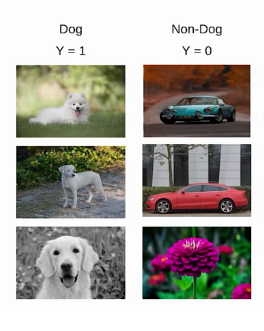

later, if we get a new set of images, consisting of non-white dogs. These new images will have a slightly different distribution from the previous images. Now the model will change its parameters according to these new images. Hence the distribution of the hidden activation will also change. This change in hidden activation is known as an internal covariate shift.
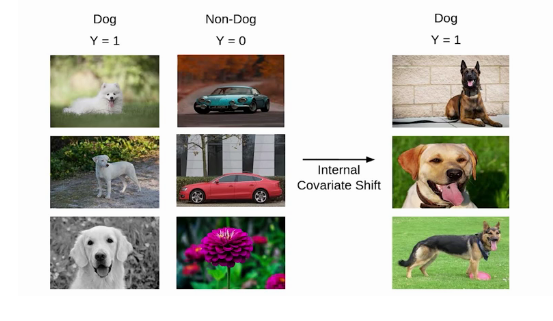


# 3. L2 regularisation

**What is Regularization?**
One common form of regularization is called L2 regularization or weight decay, `which adds a penalty term to the loss function during training`. This penalty is proportional to the squared magnitude of the weights in the network. By adding this penalty term, the network is encouraged to have `smaller weights`, which helps in reducing overfitting.

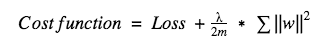

- Assume that our regularization coefficient is so high that some of the weight matrices are nearly equal to zero.
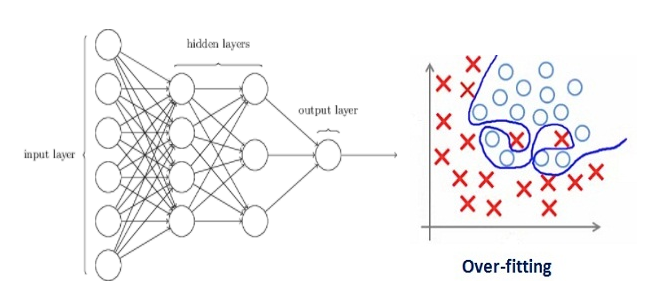

- This will result in a much simpler linear network and slight underfitting of the training data.

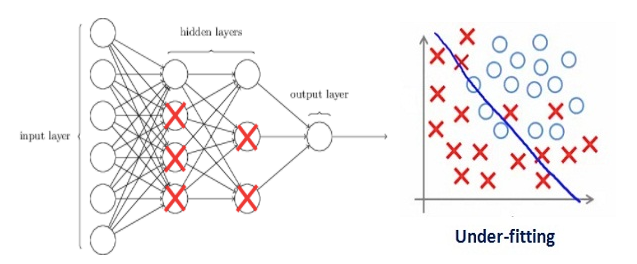

- **Such a large value of the regularization coefficient is not that useful. We need to optimize the value of regularization coefficient in order to obtain a well-fitted model as shown in the image below.**

    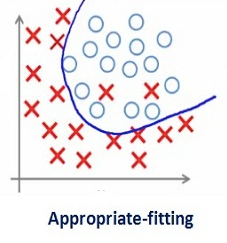

In [27]:
from tensorflow.keras.regularizers import l2

In [28]:
model = Sequential()

# layer 1 : Convolution layer 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

# layer 2 : BatchNormalization layer
model.add(BatchNormalization())

# layer 3 : Convolution layer 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# layer 4 : BatchNormalization layer 
model.add(BatchNormalization())

# layer 5 : MaxPooling layer 
model.add(MaxPooling2D(pool_size=(2, 2)))

# layer 6 : Convolution layer 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

# layer 7 : BatchNormalization layer
model.add(BatchNormalization())

# layer 8 : Convolution layer 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# layer 9 : BatchNormalization layer 
model.add(BatchNormalization())

# layer 10 : MaxPooling Layer 
model.add(MaxPooling2D(pool_size=(2, 2)))

# layer 11 : Flatten layer 
model.add(Flatten())

# layer 12 ; FullyConnected Layer + Regulization 
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))

# layer 13 : Droupout layer 
model.add(Dropout(0.5))

# layer 14 : Output layer 
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [29]:
# summary of the model
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                      

In [30]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255


In [31]:
# Training the model
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 8.1763 - accuracy: 0.2953 - val_loss: 3659.0481 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 4.8932 - accuracy: 0.4538 - val_loss: 451.5294 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 3.2039 - accuracy: 0.5146 - val_loss: 362.8550 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.2709 - accuracy: 0.5618 - val_loss: 705.4490 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7325 - accuracy: 0.6110 - val_loss: 566.0301 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4272 - accuracy: 0.6473 - val_loss: 1164.3947 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2360 - accuracy: 0.6834 - val_loss: 2

Continuing from the previous experiments, you have learnt that dropouts are pretty useful, batch normalisation helps improve performance, and L2 regularisation is not very useful on its own (i.e., without dropouts).


Let’s now conduct an experiment with all these. After this experiment, you will conduct another one to test whether adding a new convolutional layer helps improve performance

# 4. Dropouts after convolutional layer, L2 in FC, and use BN after convolutional layer.


In [32]:
model = Sequential()

# layer 1 : conv2D 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

# layer 2 : BatchNormalization
model.add(BatchNormalization())

# layer 3 : conv2D 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# layer 4 : BatchNormalization
model.add(BatchNormalization())

# layer 5 : MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# layer 6 : Dropout layer 
model.add(Dropout(0.25))

# layer 7 : conv2D 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

# layer 8 : BatchNormalization
model.add(BatchNormalization())

# layer 9 : conv2D 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# layer 10 : BatchNormalization
model.add(BatchNormalization())

# layer 11 : MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# layer 12 : Dropout layer
model.add(Dropout(0.25))

# layer 13 : Flatten layer 
model.add(Flatten())

# layer 14 : Fully Connected layer 
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))

# layer 15 : Dropout layer 
model.add(Dropout(0.5))

# layer 16 : FullyConnected layer 
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [33]:
# summary of the model
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_18 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_19 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                      

In [34]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255


In [35]:
# Training the model
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50


2023-06-27 19:31:36.145937: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 13s 8ms/step - loss: 8.5898 - accuracy: 0.0984 - val_loss: 6.8271 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 5.6420 - accuracy: 0.0975 - val_loss: 4.7289 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 4.0905 - accuracy: 0.0978 - val_loss: 3.5988 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 3.2600 - accuracy: 0.0987 - val_loss: 2.9967 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.8155 - accuracy: 0.0981 - val_loss: 2.6742 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.5775 - accuracy: 0.0969 - val_loss: 2.5016 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.4500 - accuracy: 0.0972 - val_loss: 2.4093 - val_accuracy: 0.1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


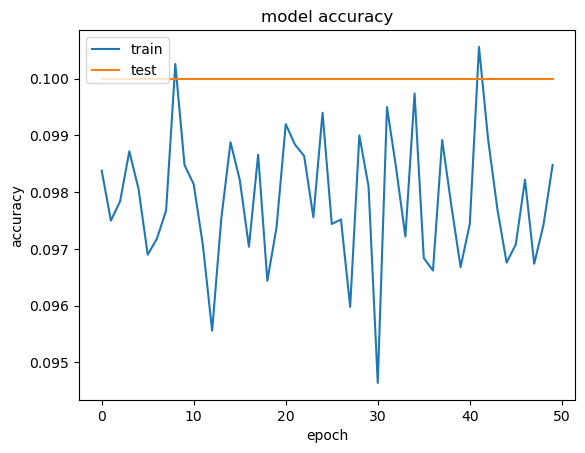

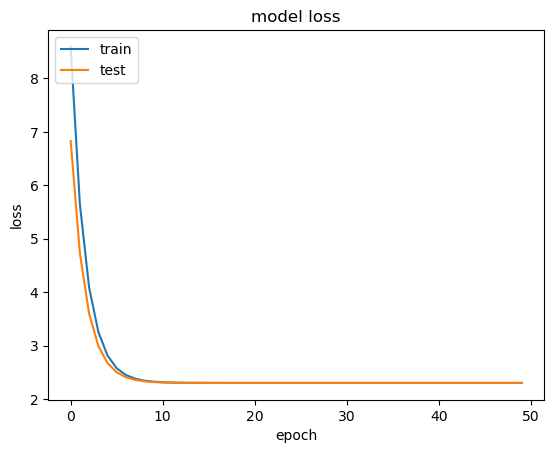

In [37]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Dropouts after the convolution layer, L2 in FC, and use BN after the convolutional layer.

 **Train accuracy = 86%, validation accuracy = 83%**

# 5. Add a new convolutional layer to the network. 
Note that by a ‘convolutional layer’, the professor refers to a convolutional unit with two sets of Conv2D layers with 128 filters each. The code for the additional convolution layer is given below:

In [38]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [39]:
# summary of the model
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_24 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_25 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_13 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                     

In [40]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255


In [41]:
# Training the model
epochs=10
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10


2023-06-27 19:45:36.890876: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 16s 9ms/step - loss: 6.1666 - accuracy: 0.1016 - val_loss: 93.5436 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 4.3302 - accuracy: 0.0983 - val_loss: 281.7292 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 3.3876 - accuracy: 0.1007 - val_loss: 3.1049 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.8840 - accuracy: 0.0988 - val_loss: 2.7299 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.6143 - accuracy: 0.0985 - val_loss: 2.5349 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.4698 - accuracy: 0.0977 - val_loss: 2.4276 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 13s 9ms/step - loss: 2.3924 - accuracy: 0.0974 - val_loss: 2.3706 - val_accuracy: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


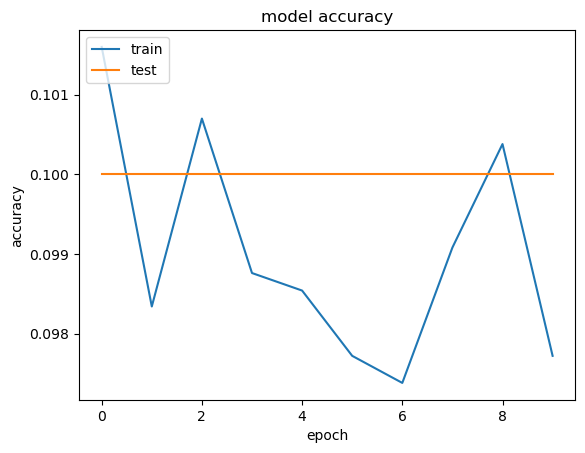

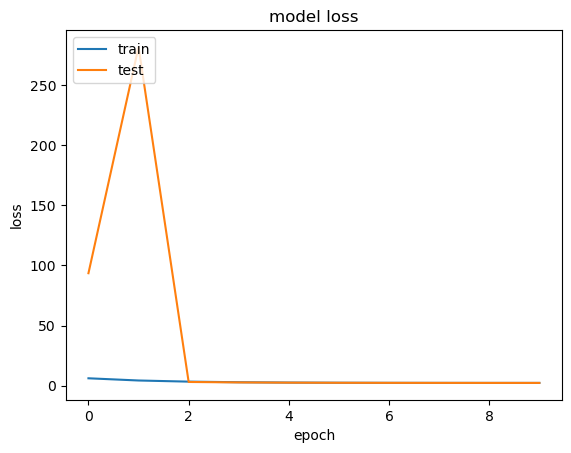

In [42]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Add a new convolutional layer to the network.

 **Train accuracy = 89%, validation accuracy = 84%**

# 6. Adding Feature Maps

In the previous experiment, you tried to increase the capacity of the model by adding a convolutional layer. Now, let’s try adding more feature maps to the same architecture.

Add more feature maps to the convolution layers: increase from 32 to 64 and 64 to 128. You can download the notebook below.

In [43]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [44]:
# summary of the model
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_32 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_18 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 30, 30, 64)        36928     
                                                                 
 activation_33 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 batch_normalization_19 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                     

In [45]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255


In [46]:
epochs=5
# Training the model
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5


2023-06-27 19:47:51.987308: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 20s 11ms/step - loss: 9.2044 - accuracy: 0.0987 - val_loss: 7.4356 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 5.9781 - accuracy: 0.0986 - val_loss: 5.0559 - val_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 4.2707 - accuracy: 0.0998 - val_loss: 3.7740 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 17s 11ms/step - loss: 3.3565 - accuracy: 0.0948 - val_loss: 3.0910 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 2.8670 - accuracy: 0.0993 - val_loss: 2.7234 - val_accuracy: 0.1000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


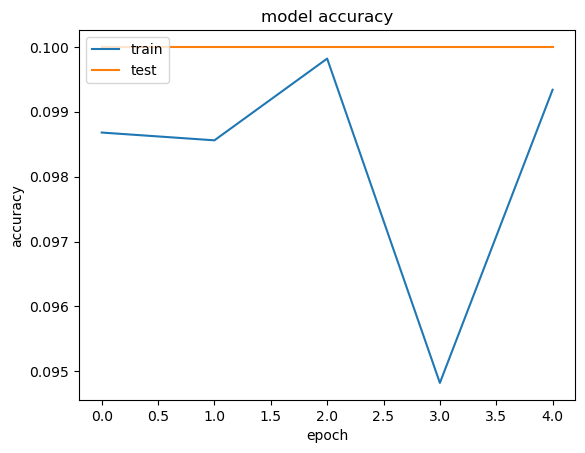

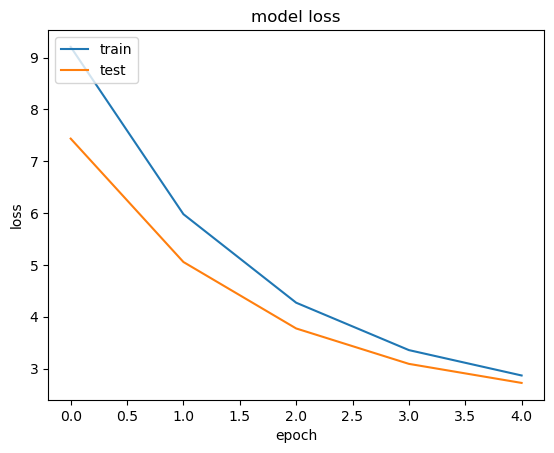

In [47]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Add more feature maps to the convolutional layers of the network.

**Train accuracy = 92%, validation accuracy = 84%**

On adding more feature maps, the model tends to overfit (as compared to adding a new convolutional layer). This shows that the task requires learning to extract more (new) abstract features rather than trying to extract more of the same features.

**Cheers to completing the session on building a CNN using Python and Keras!**

# Session Summary

In this session, you learnt to build and train CNNs in Keras and experimented with a few hyperparameters of the model. You also practised manually computing the number of parameters, output sizes, etc., of CNN-based architectures.


Based on these experiments, you saw that the performance of CNNs depends heavily on multiple hyperparameters: the number of layers, the number of feature maps in each layer, the use of dropouts, batch normalisation, etc. Thus, it is advisable to first fine-tune your model hyperparameters by conducting several experiments. Only when you are convinced that you have found the right set of hyperparameters should you train the model with a larger number of epochs (since the amount of time and computing power you have is usually limited).